In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In the context of quantized neural network training, we normally find a proper quantization function to apply on weights. Below list 2 examples: `naive_quantize` and `shen_quantize`. 

Through visualzation we can see that, these functions has no gradient nearly everywhere (see below figures). If we use the default back-propagation or AUTO-GRAD provided by tools, we'll get many 0-gradient and finally use them to update our weights, which causes problems to the learning. That's definitely not what we wanted. 

So in order to preserve the gradient, Hinton proposed a method called **Straight Through Estimator (STE)** to handle this problem. This method simply ignores the quantization function applied to the weights during back propagation (still apply to forward phase), and directly use the gradient with respect to the weight-as-a-whole as the quantity to update the weights.

With regard to the implementation, take pytorch for instance, we need to define such a Conv / Linear Module (or Layer) whose forward quantizes its weight first and then calculate the output; and most importantly, its backward should be explicitly defined using STE to overwrite the default behavior of autograd. 

In [35]:
def naive_quantize(data, scale_factor):
    return np.round(data * scale_factor) / scale_factor


def shen_quantize(data):
    return np.abs(data).mean() * np.sign(data) 


def plot_quantize_func(quantize_func, *args, **kwargs):
    x = np.arange(10000) / 10000 - 0.5
    y = quantize_func(x, *args, **kwargs)
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.plot(x, y)
    ax.set_aspect('equal', 'datalim')
    plt.title(quantize_func.__name__)
    plt.show()

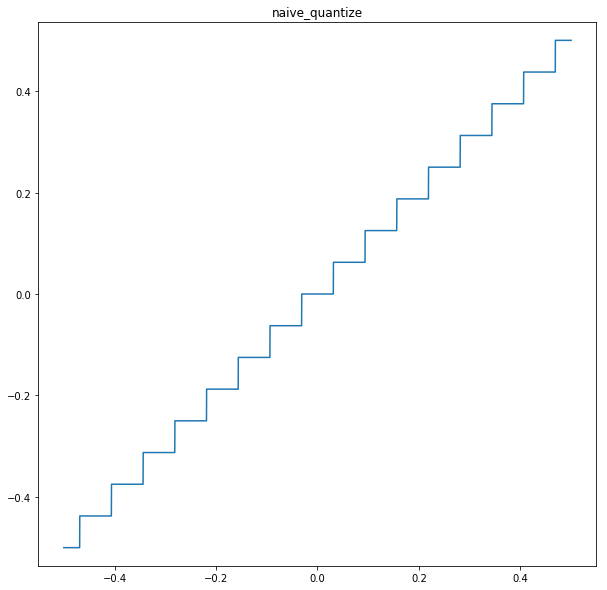

In [36]:
plot_quantize_func(naive_quantize, 16)

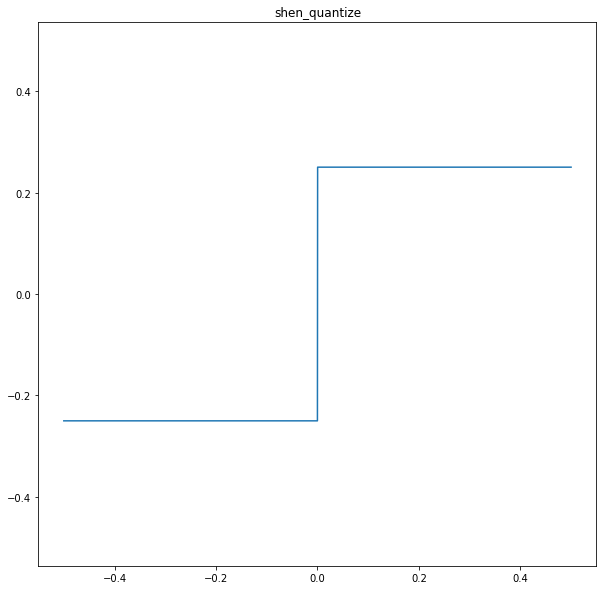

In [37]:
plot_quantize_func(shen_quantize)